In [1]:
'''
Author: Harshad Sathaye
'''
import numpy as np
import matplotlib.pyplot as plt

'''
Common values for all modulation techniques
'''
samp_rate = 50 # 50 samples/s
baud = 1 # 1 symbol/s
bitrate = 1 # 1 bits/s - 1 symbol = 1 bit

carr_freq = 2 # Hz
dfreq = 1 # Hz


### FSK - Frequency Shift Keying

In this digital modulation technique frequency shift marks a bit transition.
I.e., $f_{c}$ + $\Delta f$ means 1 and $f_{c}$ - $\Delta f$ means 0 where $f_{c}$ is the carrier frequency

##### Step 1 - Generate a baseband signal

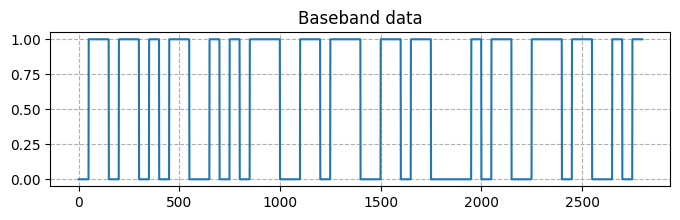

In [2]:
fig = plt.figure(figsize=(8,2))
#grid = plt.GridSpec(4, 1, wspace=0.4, hspace=0.3)

message = 'message'
res = ''.join(format(ord(i), '08b') for i in message)
message_bits = np.array([int(bit) for bit in res])

baseband_data = np.kron(message_bits, np.ones(int(samp_rate / bitrate))) # 1 bit = sample_rate/bitrate

plt.plot(baseband_data)
plt.title("Baseband data")
plt.grid(True, linestyle='--')

##### Step 2 - Modulation

Generate two carrier $c_{1}$ and $c_{2}$ such that $f_{c1}$ = $f_{c} + \Delta f$ and $f_{c2}$ = $f_{c} - \Delta f$

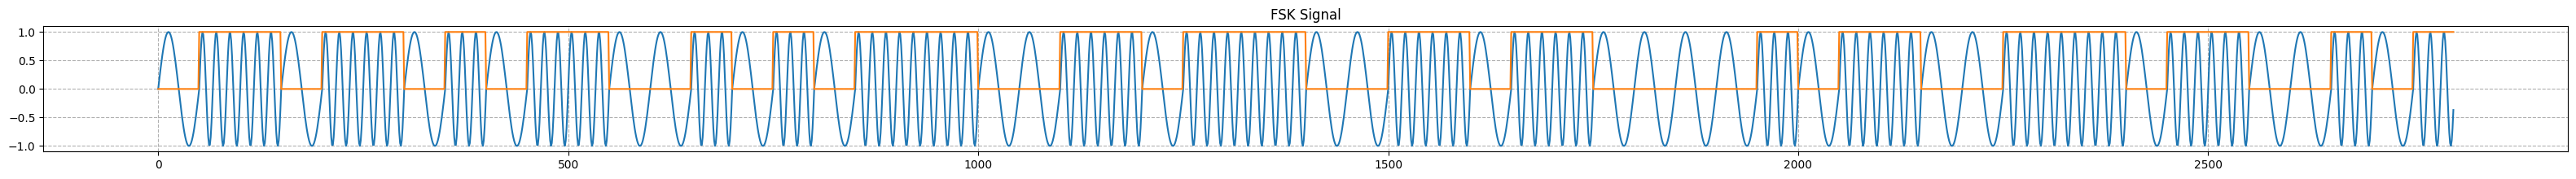

In [3]:

c_samples = np.arange(len(baseband_data))

samp_rate = 50
phase = 0   

# Multiplexer selection to for required modulation
c1 = np.sin(2*np.pi*(carr_freq+dfreq)*c_samples/samp_rate)
c2 = np.sin(2*np.pi*(carr_freq-dfreq)*c_samples/samp_rate)

fsk_mod = baseband_data * c1 + (-baseband_data +1)*c2

#time = np.arange(len(message_bits)*samp_rate)
ax, fig = plt.subplots(figsize=(40, 2))
plt.plot(fsk_mod)
plt.plot(baseband_data)
plt.title('FSK Signal')
plt.grid(True, linestyle='--')


In [4]:
# Load FSK-modulated waveform from file
fsk_mod = np.fromfile("fsk_waveform_1.dat")

# Demodulator for FSK
def fsk_demodulator(received_signal, samp_rate, carr_freq, dfreq):
    c_samples = np.arange(len(received_signal))

    # Generate two carrier signals for demodulation
    c1 = np.sin(2*np.pi*(carr_freq+dfreq)*c_samples/samp_rate)
    c2 = np.sin(2*np.pi*(carr_freq-dfreq)*c_samples/samp_rate)

    # Demodulate the received signal
    demod_c1 = received_signal * c1
    demod_c2 = received_signal * c2

    # Integrate over symbol duration to make decisions
    decision_c1 = np.sum(demod_c1.reshape(-1, int(samp_rate/baud)), axis=1)
    decision_c2 = np.sum(demod_c2.reshape(-1, int(samp_rate/baud)), axis=1)

    # Make bit decisions based on energy comparison
    demodulated_bits = np.where(decision_c1 > decision_c2, 1, 0)

    return demodulated_bits

# Example usage:
demodulated_bits = fsk_demodulator(fsk_mod, samp_rate, carr_freq, dfreq)

# Binary array to ASCII
demodulated_message = ''.join([str(bit) for bit in demodulated_bits])
demodulated_message = ''.join([chr(int(demodulated_message[i:i+8], 2)) for i in range(0, len(demodulated_message), 8)])

print("Demodulated ASCII Message:", demodulated_message)


Demodulated ASCII Message: ÓÅßÌÅßÄÎÞÂÏÌØÏÛßÏÄÉÓÅÌÌÙÏÞregular fsk signal
